In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

In [2]:
### Loading the Dataset
data = pd.read_csv("House_Rent_Dataset.csv")
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
#Total Records of the dataset in terms of ROWS & COLUMNS
print('Total Rows and Columns:\n {}'.format(data.shape))

Total Rows and Columns:
 (4746, 12)


In [4]:
#More detailed info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
#Converting 'Posted On' columns to [DateTime]
data['Posted On'] = pd.to_datetime(data['Posted On'])

In [6]:
#Checking if the change has been made
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Rent               4746 non-null   int64         
 3   Size               4746 non-null   int64         
 4   Floor              4746 non-null   object        
 5   Area Type          4746 non-null   object        
 6   Area Locality      4746 non-null   object        
 7   City               4746 non-null   object        
 8   Furnishing Status  4746 non-null   object        
 9   Tenant Preferred   4746 non-null   object        
 10  Bathroom           4746 non-null   int64         
 11  Point of Contact   4746 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 445.1+ KB


In [7]:
#Checking if there are duplicates in the dataset
print('Duplicated values: {}'.format(data.duplicated().sum()))

Duplicated values: 0


In [8]:
#Descriptive Statistics Summary
data.describe()

,Posted On,BHK,Rent,Size,Bathroom
count,4746,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2022-06-07 18:01:40.126422272,2.083860,3.499345e+04,967.490729,1.965866
min,2022-04-13 00:00:00,1.000000,1.200000e+03,10.000000,1.000000
25%,2022-05-20 00:00:00,2.000000,1.000000e+04,550.000000,1.000000
50%,2022-06-10 00:00:00,2.000000,1.600000e+04,850.000000,2.000000
75%,2022-06-28 00:00:00,3.000000,3.300000e+04,1200.000000,2.000000
max,2022-07-11 00:00:00,6.000000,3.500000e+06,8000.000000,10.000000
std,NaN,0.832256,7.810641e+04,634.202328,0.884532


In [9]:
#Calling the 'head' of the dataset
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [10]:
#Area Types Distribution in the dataset
print('Distribution of Area Types: \n{}'.format(data['Area Type'].value_counts()))
print('  ')
print('Percentage Distribution of Area Types: \n{}'.format((data['Area Type'].value_counts()/ len(data['Area Type'])*100)))

Distribution of Area Types: 
Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64
  
Percentage Distribution of Area Types: 
Area Type
Super Area     51.538137
Carpet Area    48.419722
Built Area      0.042141
Name: count, dtype: float64


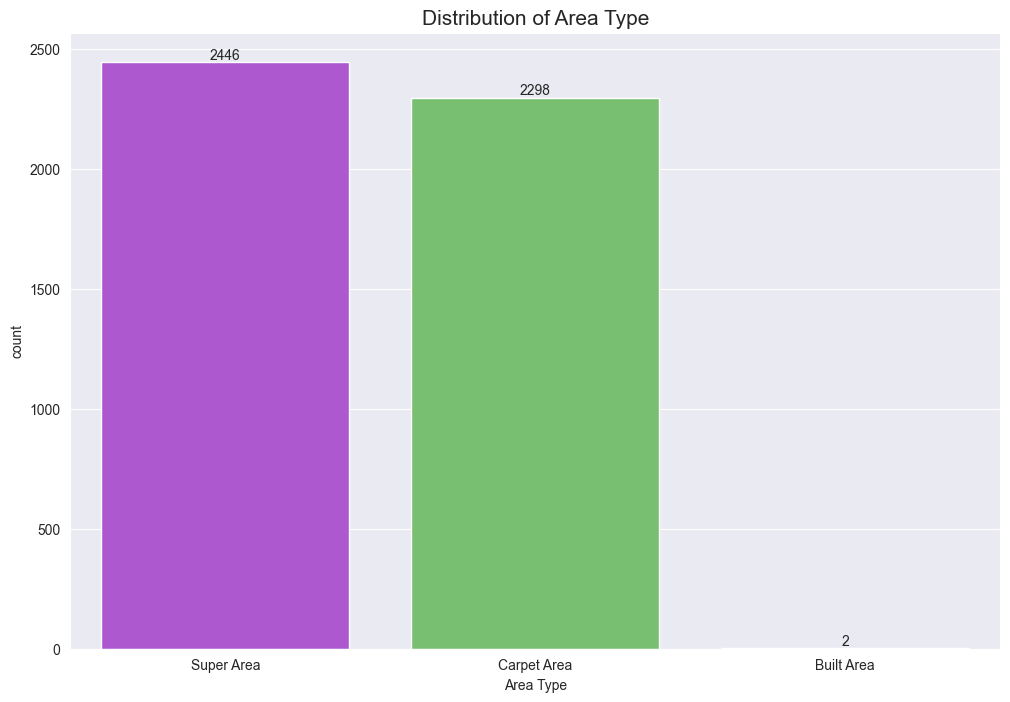

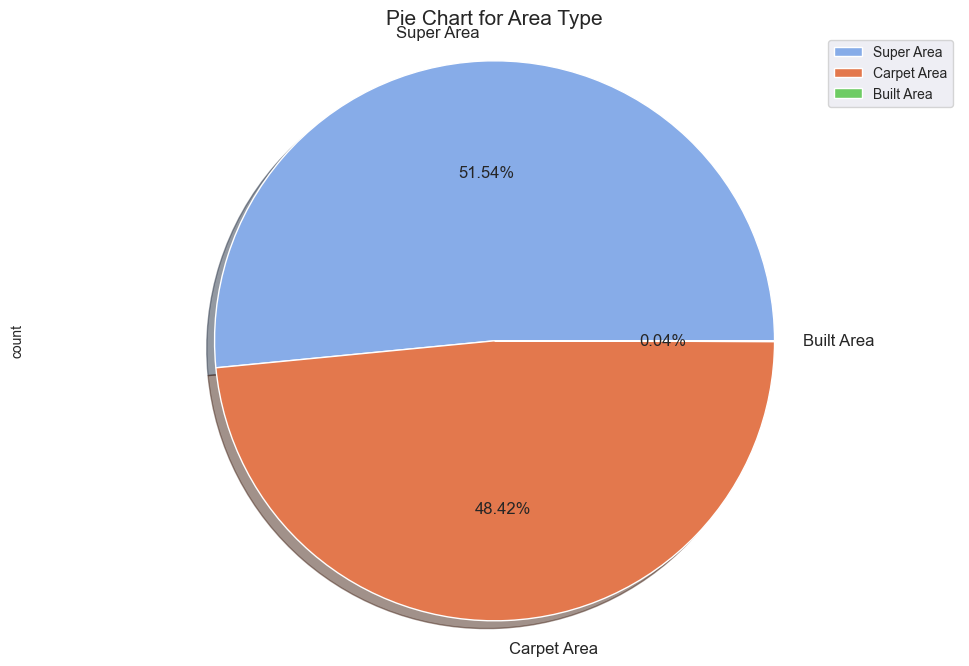

In [11]:
#Visualization of the percentage of the Area Types Distribution
sns.set_style('darkgrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='Area Type',data=data, palette=['#b644e3', '#6ecc64', '#e3784d'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Area Type',fontsize=15)
plt.show()

plt.figure(figsize = (12, 8)) 
data['Area Type'].value_counts().plot.pie(textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Area Type',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

In [12]:
#Calling the head DataFrame to select other variables for analysis
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [13]:
#City Distribution - Cities Ranked based on availability of houses for rent
print('Distribution of Houses per cities: \n{}'.format(data['City'].value_counts()))
print(' ')
print('Percentage of the Distribution of Houses per cities: \n{}'.format(data['City'].value_counts()/len(data.City)*100))

Distribution of Houses per cities: 
City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64
 
Percentage of the Distribution of Houses per cities: 
City
Mumbai       20.480405
Chennai      18.773704
Bangalore    18.668352
Hyderabad    18.289086
Delhi        12.747577
Kolkata      11.040877
Name: count, dtype: float64


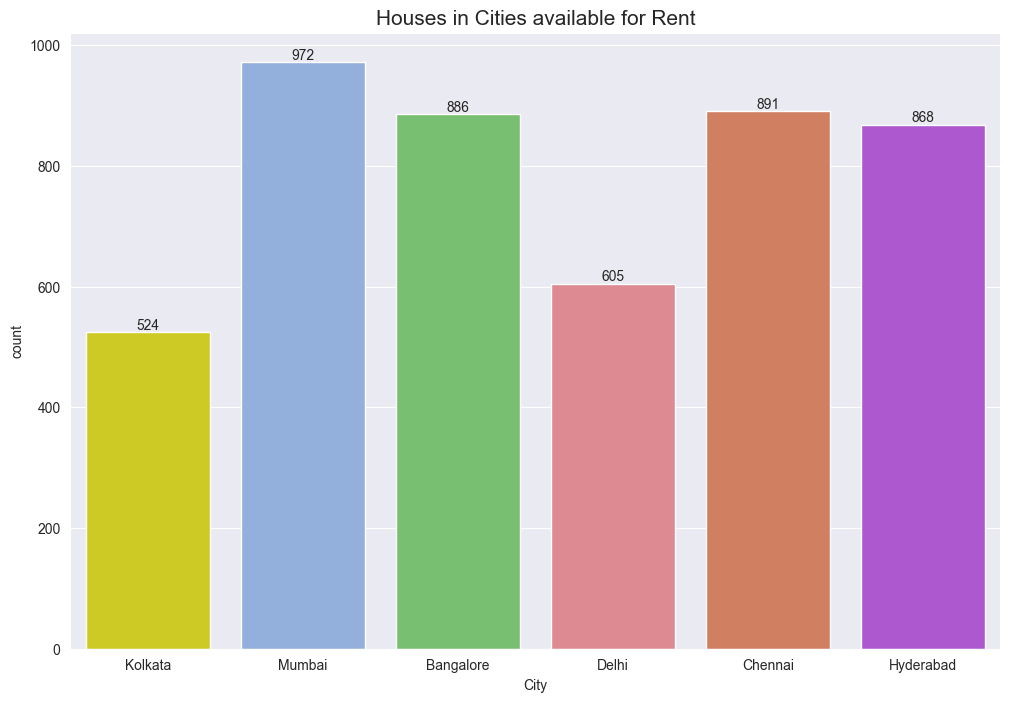

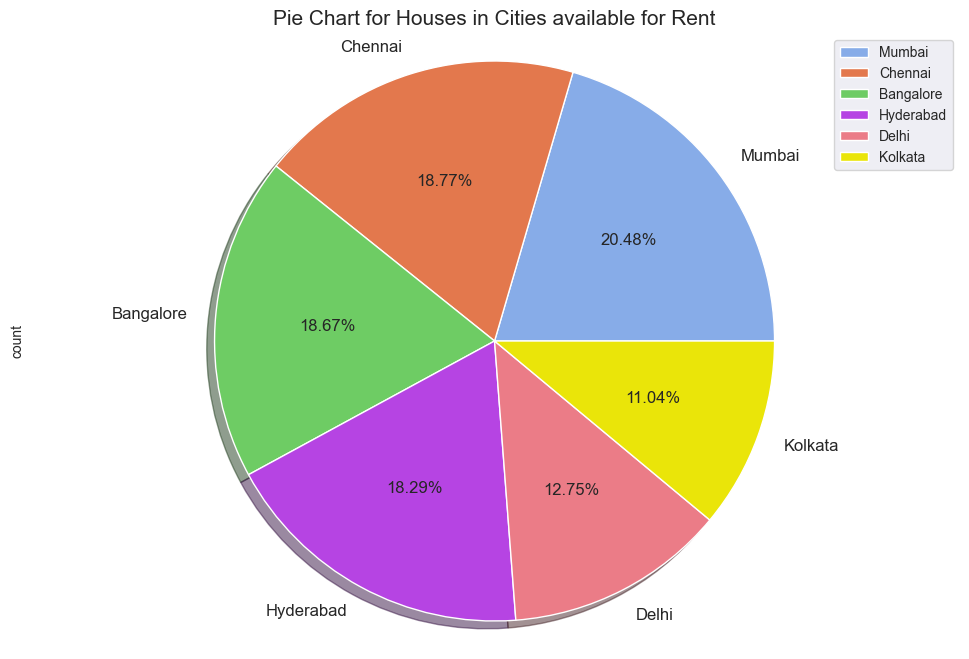

In [14]:
#Visualization of Houses for rent per city
sns.set_style('darkgrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='City',data=data, palette=['#EAE509','#87ace8', '#6ecc64','#eb7c87','#e3784d','#b644e3'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Houses in Cities available for Rent',fontsize=15)
plt.show()

plt.figure(figsize = (12, 8)) 
data['City'].value_counts().plot.pie(textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Houses in Cities available for Rent',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

In [15]:
#Distribution of Furnishing Status in terms of Housing Condition
print('Housing Status: \n{}'.format(data['Furnishing Status'].value_counts()))
print(' ')
print('Percentage of the Distribution of Housing Status: \n{}'.format(data['Furnishing Status'].value_counts()/len(data['Furnishing Status'])*100))

Housing Status: 
Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64
 
Percentage of the Distribution of Housing Status: 
Furnishing Status
Semi-Furnished    47.429414
Unfurnished       38.242731
Furnished         14.327855
Name: count, dtype: float64


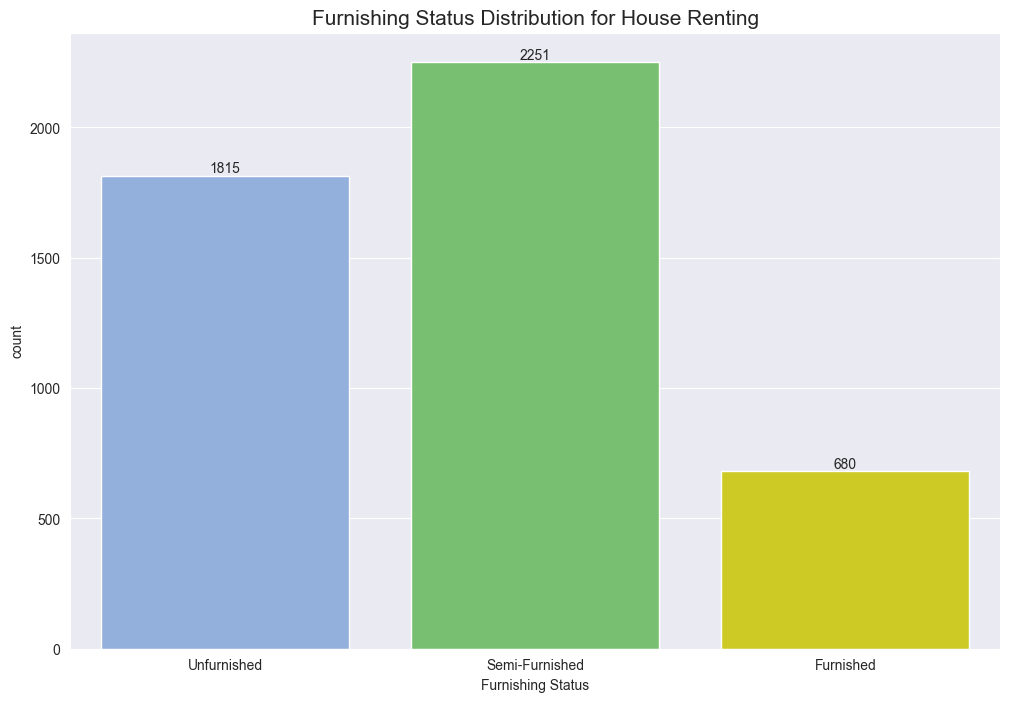

In [16]:
#Visualization of Housing Status for rent 
sns.set_style('darkgrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Furnishing Status',data=data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Furnishing Status Distribution for House Renting',fontsize=15)
plt.show()

Percentage of Tenancy Types Preferred for rent: 
Tenant Preferred
Bachelors/Family    72.566372
Bachelors           17.488411
Family               9.945217
Name: count, dtype: float64
 


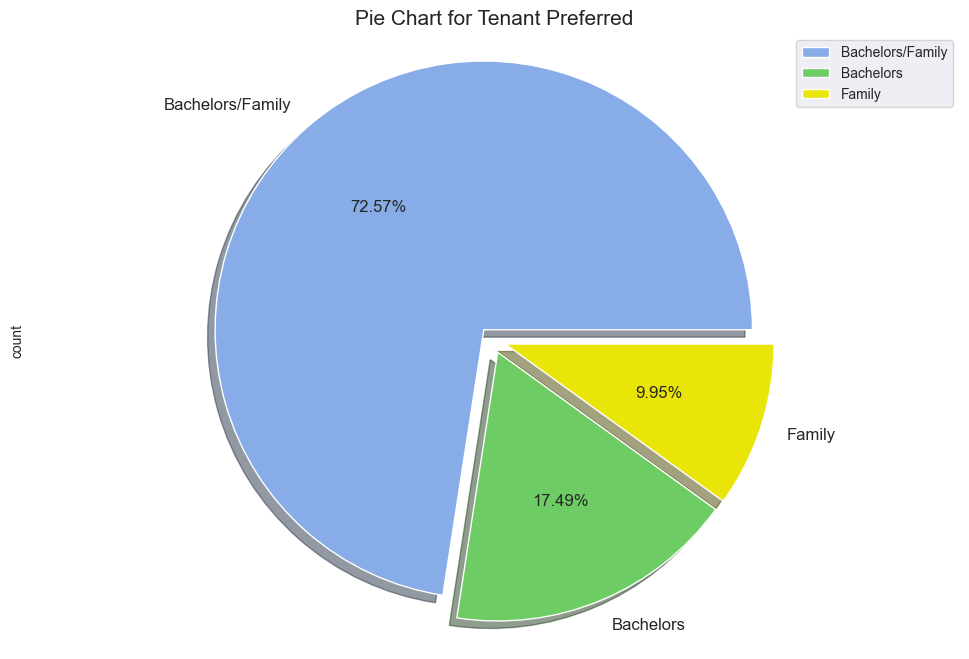

In [17]:
#Distribution of the Preferred Tenant Type for renting
print("Percentage of Tenancy Types Preferred for rent: \n{}".format(data['Tenant Preferred'].value_counts()/len(data['Tenant Preferred'])*100))
print(' ')

colors = ['#87ace8', '#6ecc64', '#EAE509']
plt.figure(figsize = (12, 8)) 
data['Tenant Preferred'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Tenant Preferred',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

In [18]:
#Frequency of Bathrooms available in house for rent Distribution
print('Frequency of Bathrooms available in house for rent: \n{}'.format(data['Bathroom'].value_counts()))

Frequency of Bathrooms available in house for rent: 
Bathroom
2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: count, dtype: int64


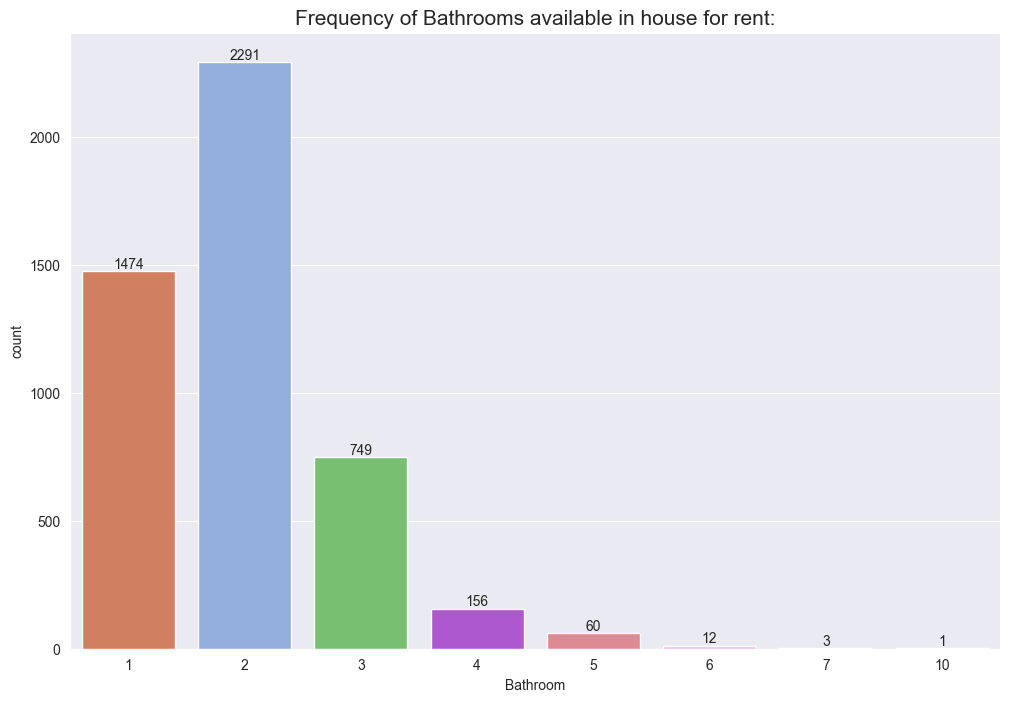

In [19]:
#Visualization of the Frequency of Bathrooms available in house for rent Distribution
sns.set_style('darkgrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Bathroom',data=data, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#fab1f3','#86f7d7','#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of Bathrooms available in house for rent:',fontsize=15)
plt.show()

Proportion of Middlemen agents Renters should contact:
Point of Contact
Contact Owner      67.762326
Contact Agent      32.216603
Contact Builder     0.021070
Name: count, dtype: float64
 


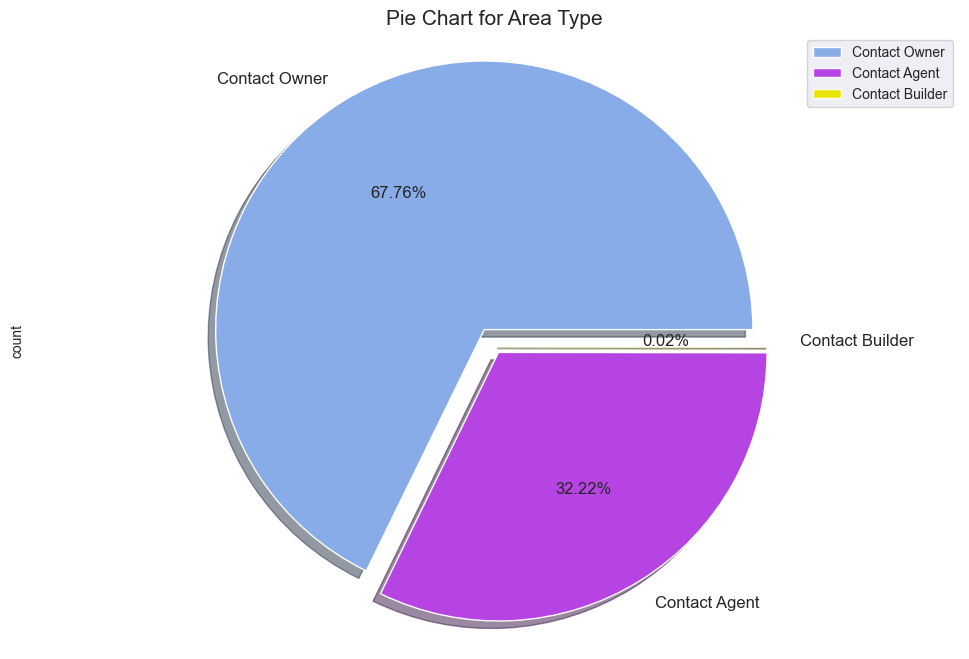

In [20]:
#Proportion of Middlemen agents Renters should contact:
print('Proportion of Middlemen agents Renters should contact:\n{}'.format(data['Point of Contact'].value_counts()/len(data['Point of Contact'])*100))
print(' ')

colors = ['#87ace8','#b644e3', '#EAE509']
plt.figure(figsize = (12, 8)) 
data['Point of Contact'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Area Type',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

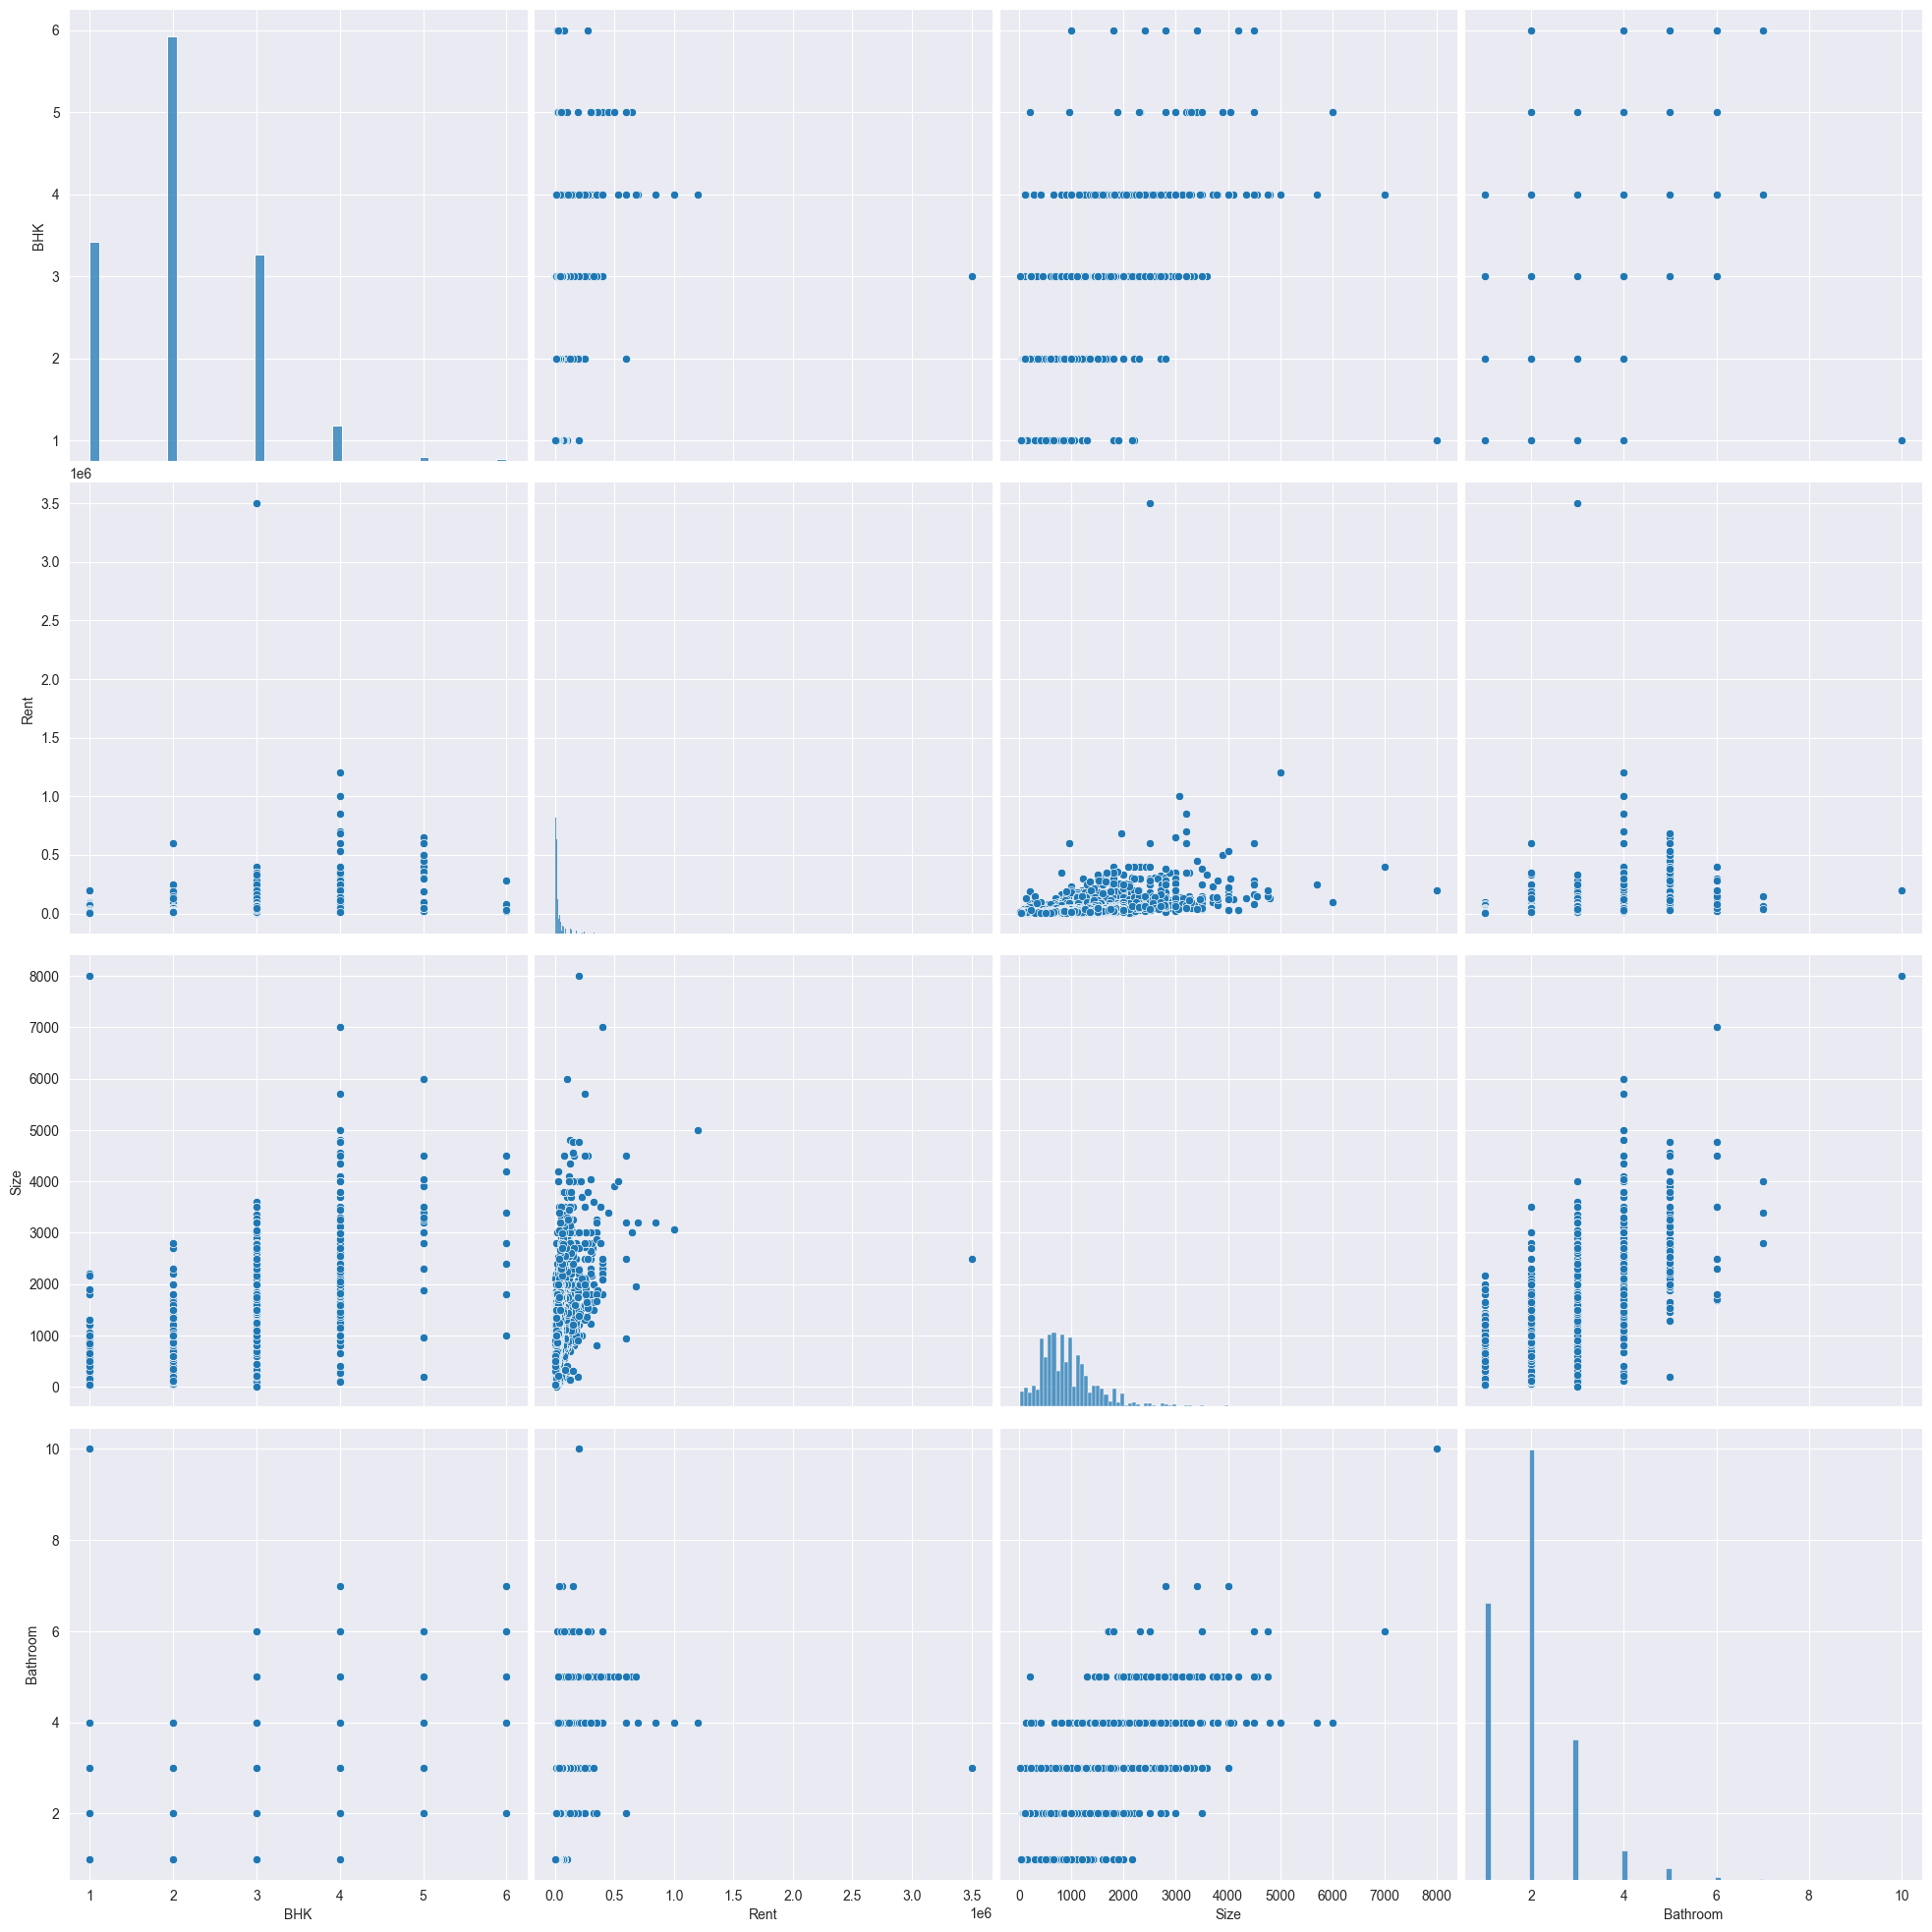

In [21]:
#Scatter Matrix of the Entire Dataset
sns.pairplot(data, height=5)

<Axes: title={'center': 'Histogram of Rent Distribution'}, xlabel='Rent', ylabel='Count'>

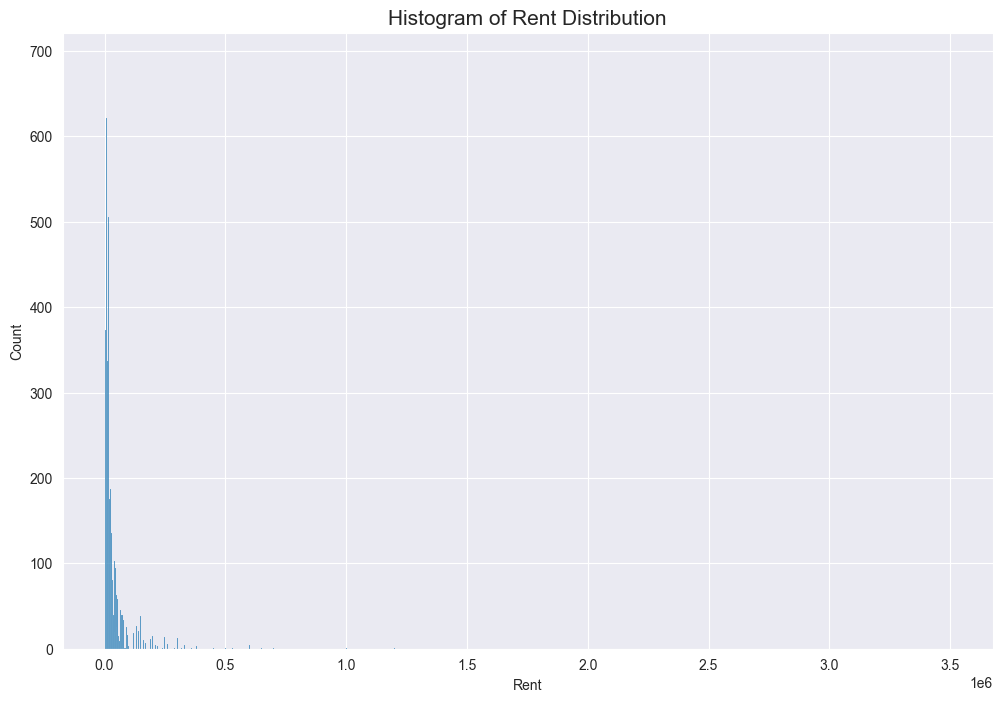

In [22]:
#Rent Distribution
plt.figure(figsize = (12, 8)) 
plt.title('Histogram of Rent Distribution',fontsize=15)
sns.histplot(data, x='Rent')

In [23]:
#House size for rent
print('Biggest House size for rent: {}'.format(data['Size'].max())+' sq.ft')
print('Smallest House size for rent: {}'.format(data['Size'].min())+' sq.ft')
print('Average-sized House for rent: {}'.format(data['Size'].mean().round(-1))+' sq.ft')

Biggest House size for rent: 8000 sq.ft
Smallest House size for rent: 10 sq.ft
Average-sized House for rent: 970.0 sq.ft


<Axes: >

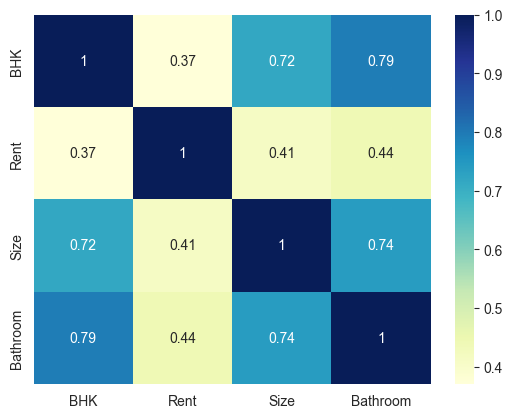

In [24]:
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

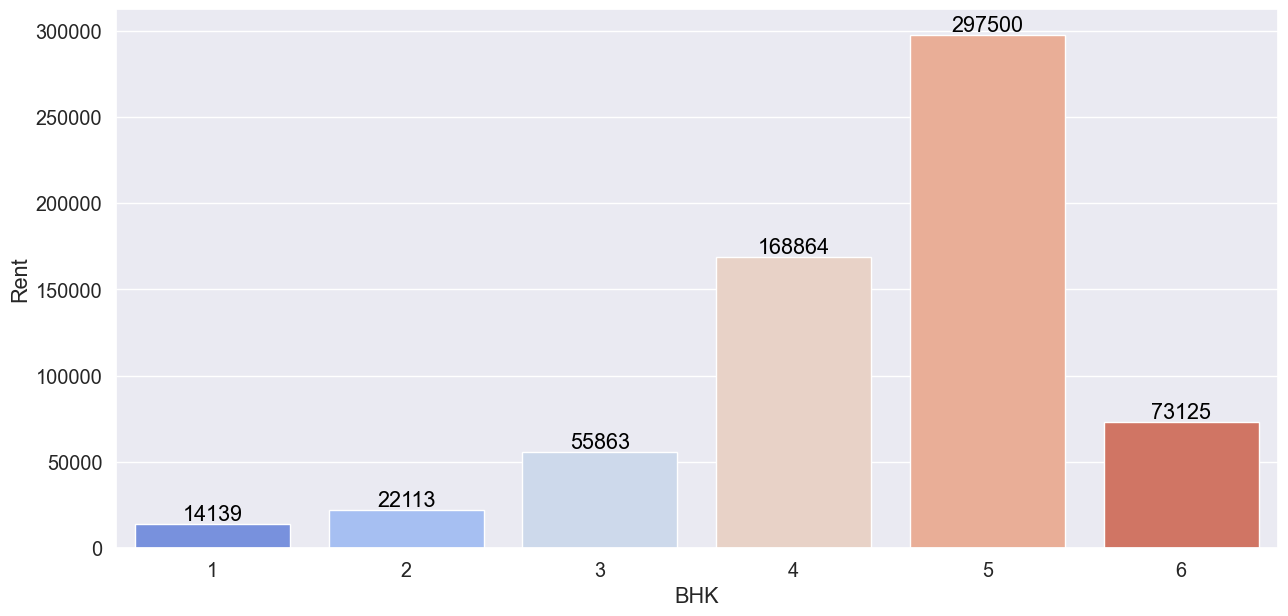

In [25]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=data['BHK'], y=data['Rent'], palette='coolwarm', ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

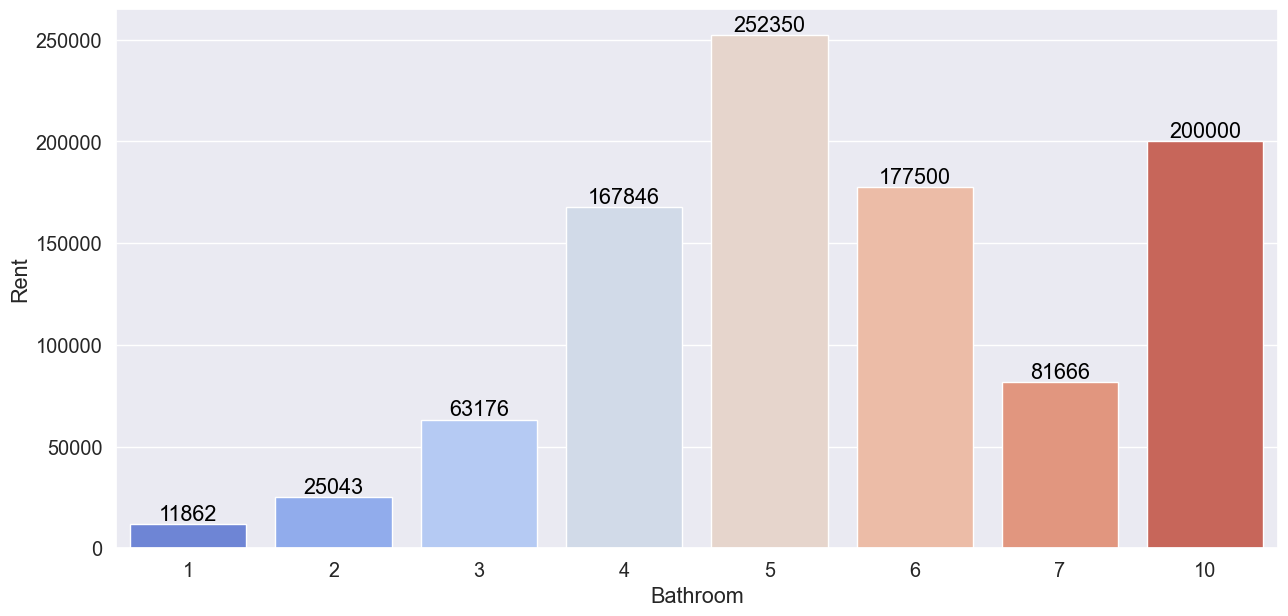

In [26]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=data['Bathroom'], y=data['Rent'], palette='coolwarm', ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

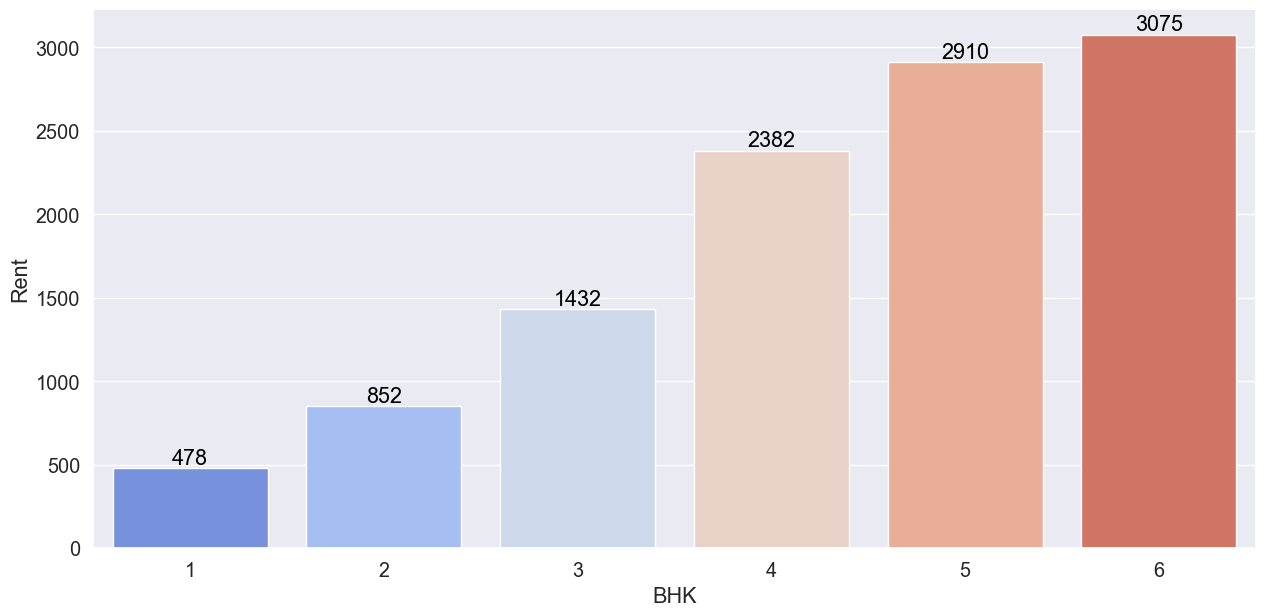

In [27]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=data['BHK'], y=data['Size'], palette='coolwarm', ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

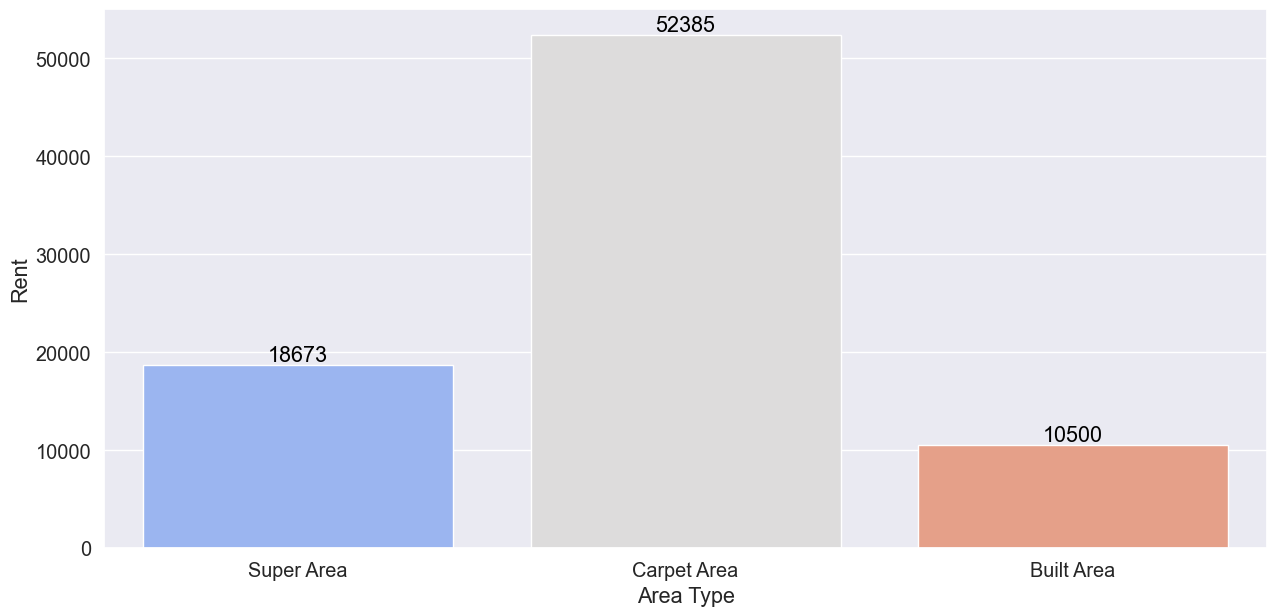

In [28]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=data['Area Type'], y=data['Rent'], palette='coolwarm', ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

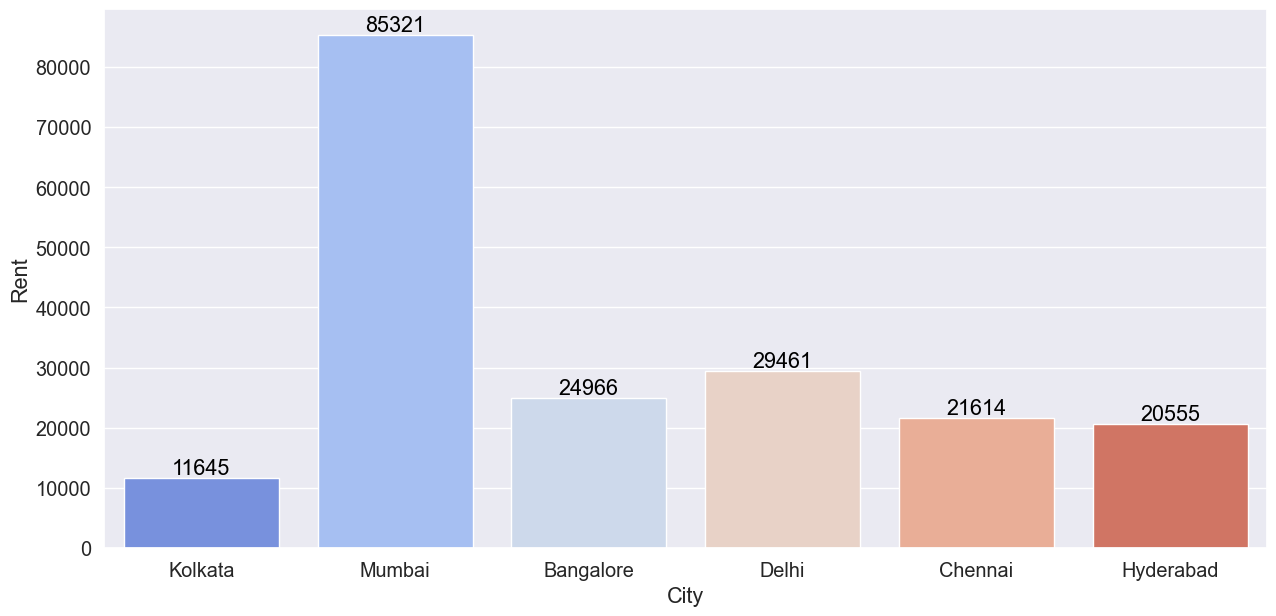

In [29]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=data['City'], y=data['Rent'], palette='coolwarm', ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

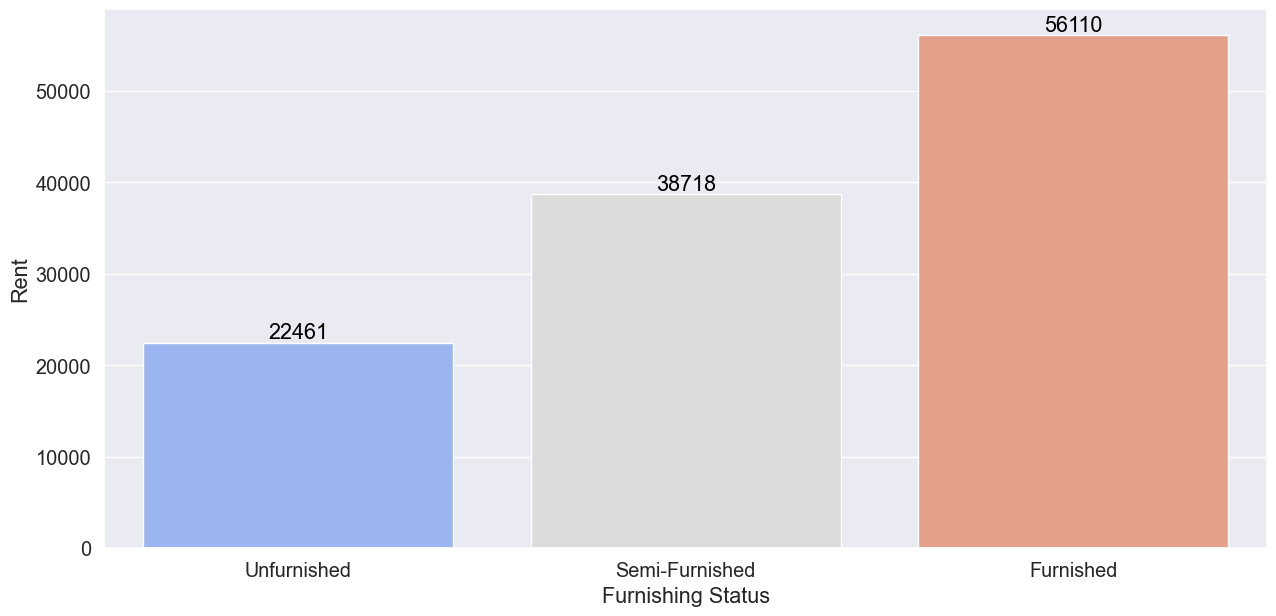

In [30]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=data['Furnishing Status'], y=data['Rent'], palette='coolwarm', ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

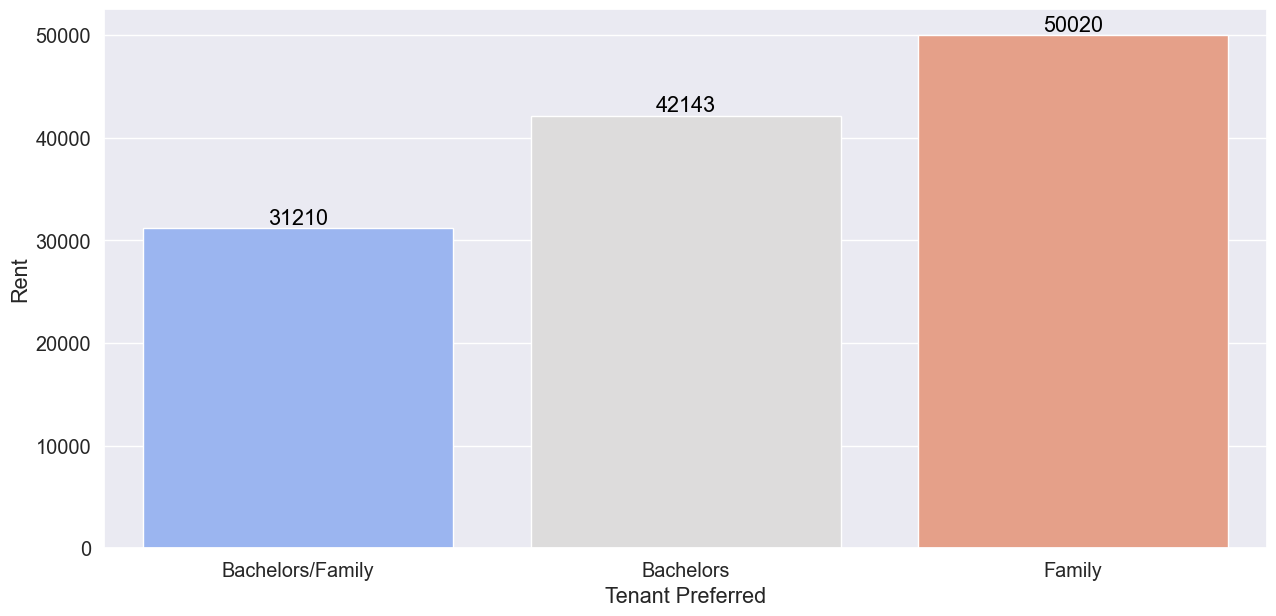

In [31]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=data['Tenant Preferred'], y=data['Rent'], palette='coolwarm', ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

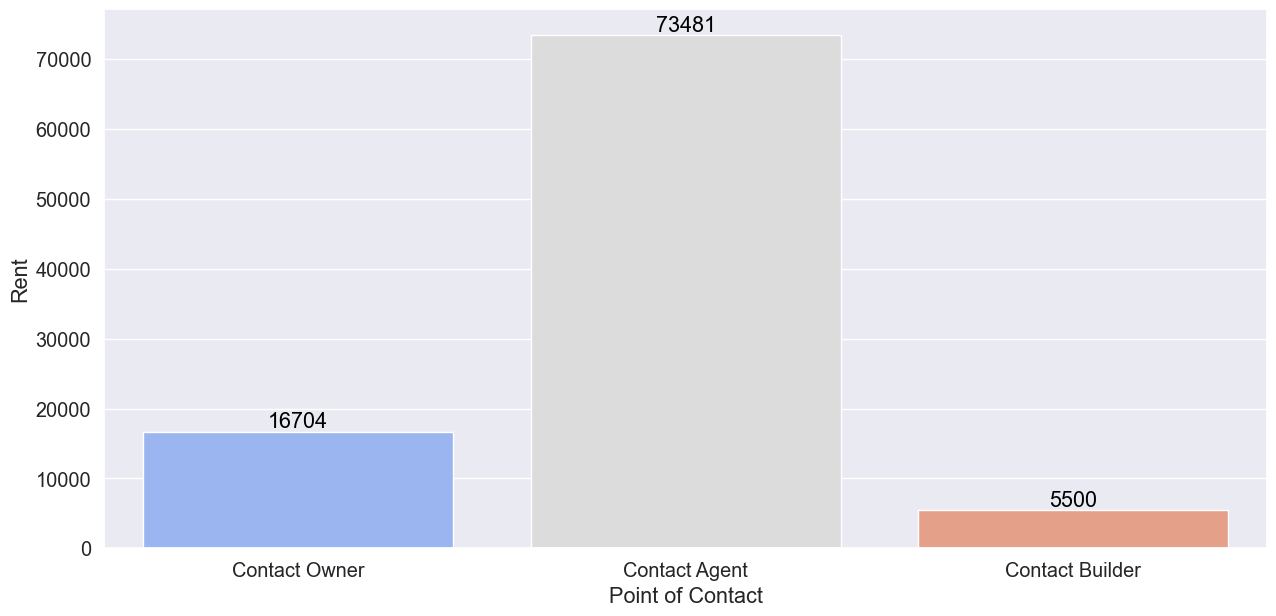

In [32]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=data['Point of Contact'], y=data['Rent'], palette='coolwarm', ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

In [33]:
print(data.duplicated().sum())
data = data.drop_duplicates()

0


In [34]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [35]:
#Removing irrelevant columns
data = data.drop(['Posted On','Area Locality','Floor'], axis=1)
data

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [36]:
data.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [37]:
#Coding strings into numeric data using dummies
housing_data = pd.get_dummies(data, columns=['Area Type', 'City','Furnishing Status','Tenant Preferred', 'Point of Contact'])

In [38]:
housing_data.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
1,2,20000,800,1,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,2,17000,1000,1,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
3,2,10000,800,1,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,2,7500,850,1,False,True,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True


In [39]:
#Defining the variables for model building
x = housing_data.drop(['Rent'], axis=1)
y = housing_data['Rent'] 

In [40]:
#Splitting into test and training dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size= 0.10, random_state=2
)

In [41]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4271, 21) (475, 21) (4271,) (475,)


In [42]:
data.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [43]:
from sklearn.preprocessing import StandardScaler

X = data.drop('Rent', axis= 1)
y = data['Rent']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
x_train.shape

(3796, 21)

In [45]:
#Using Linear Regression Modelling
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_prediction =lr.predict(x_test)
score= lr.score(x_test, y_test)
print('Test Accuracy:' , (score)*100)

Test Accuracy: 52.01892595308293


In [46]:
y_preds = lr.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print("Coefficients: \n", lr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))


Coefficients: 
 [ 2.78810844e+03  2.31348807e+04  1.03766259e+04  1.01163422e+16
  2.20304934e+17  2.20312403e+17  8.33781800e+16  8.28940705e+16
  7.09464339e+16  8.13502620e+16  6.54518475e+16  8.52840595e+16
  5.57613540e+15  7.98352959e+15  7.77519911e+15 -7.48940444e+16
 -8.77683353e+16 -5.85786624e+16  1.28406300e+17  4.46017960e+15
  1.28433873e+17]
Mean squared error: 1912228760.84
Coefficient of determination: 0.52
